# Normalización de un vector

Dado un arreglo:
$$
v \in R^{n}
$$
Cuyos elementos cumplen:
$$
v_{i} \in [-10,10]
$$
Se le pide normalizar el arreglo considerando que $\mu$ es la media aritmética de los elementos de $v$ y $\sigma$ es la desviación estándar de los elementos de $v$.

Los elementos del arreglo de salida deben tener esa forma:
$$
o_{i} = (v_{i} - \mu) / \sigma
$$
Luego de normalizar todos los elementos del vector se debe cumplir que $\mu_{o}$ es $0$ y $\sigma_{o}$ es $1$.

Consideraciones para su solución:

- Tome en cuenta la precisión, pero sin priorizarla sobre la rapidez.
- Deberá trabajar con arreglos `numpy`.
- Su función en *Python* que normalizará el arreglo de entrada no puede emplear funciones de ningún módulo, ni predefinidas por el entorno.
- Su función en *C* que normalizará el arreglo de entrada solo puede emplear como función auxiliar la función `sqrt` o alguna de sus variantes.

In [32]:
import random

In [33]:
import numpy as np

In [34]:
def crear_arreglo(tam):
  rango_min = -10.0
  rango_max = 10.0
  return np.asarray([random.uniform(rango_min, rango_max) for _ in range(tam)], dtype=np.float32)

a) (0.5 ptos) Usar la función `crear_arreglo` para crear un arreglo de 16 elementos.

In [35]:
arregloP= crear_arreglo(16)

print(arregloP)


[ 8.154561  -2.5624297  8.964426  -3.947782  -7.543836  -9.710329
 -1.9429573  6.1536274 -2.8735917  1.8795063 -6.707494  -8.049024
  1.7755806  7.9298296 -1.8006806 -1.2272186]


b) (2.0 ptos) Implementar en *Python* la función `py_normalizar_arreglo`. Debe recibir un arreglo y devolver el arreglo normalizado.

In [36]:
def py_normalizar_arreglo(arreglo):
    
    N=len(arreglo)

    suma=0.0
    r=0.0
    ##hallamos la media
    for i in range(N):

        suma = suma + arreglo[i]
    u= suma/N

    
    ##hallamos la desviacion
    for j in range(N):

       termino= (arreglo[j]-u)**(2)
    
       r= r+ termino
   
    desviacion= (r/N)**(1/2)
   
    #Ahora normalizamos el arreglo con la media y la desviacion:

    for k in range(N):

        arreglo[k]= (arreglo[k]-u)/desviacion
    
    return arreglo



c) (0.5 pto) Pruebe la función `py_normalizar_arreglo` en el arreglo que creó en el ítem (a), y con las funciones `mean` y `stdev` del módulo `statistics` compruebe que la media del arreglo normalizado es cero y la desviación estándar es uno.

In [37]:
import statistics

arreglo_normalizado_py= py_normalizar_arreglo(arregloP)

media_normalizada= statistics.mean(arreglo_normalizado_py)

desviacion_normalizada= statistics.stdev(arreglo_normalizado_py)


print("Arreglo normalizado: ", arreglo_normalizado_py)
print("media N: ",media_normalizada)
print("desviacion N: ",desviacion_normalizada)



Arreglo normalizado:  [ 1.5191587  -0.31554696  1.6578044  -0.5527137  -1.1683437  -1.5392386
 -0.20949578  1.1766069  -0.36881664  0.4448946  -1.0251652  -1.2548298
  0.42710295  1.4806856  -0.1851386  -0.0869642 ]
media N:  3.7252903e-09
desviacion N:  1.0327955282089378


d) (3.0 ptos) Implementar la función `normalizar_vector` en *C*.

In [38]:
%%file normalizar_arreglo.c

#include <math.h>
void c_normalizar_arreglo(float* arreglo, float* arreglo_ord){

    int N=16;
    float suma=0.0;
    float r=0.0;
    
    //hallamos la media

    for(int i=0;i<N;i++){

        suma = suma + arreglo[i];
    
    }

    float u= suma/N;


    //hallamos la desviacion

    for(int j=0;j<N;j++){

       float termino= (arreglo[j]-u)*(arreglo[j]-u);
    
       r= r+ termino;
    }

    float desviacion= sqrt(r/N);

    //Normalizamos

    for(int k=0;k<N;k++){

        arreglo_ord[k]= (arreglo[k]-u)/desviacion;
    }
    
}



Overwriting normalizar_arreglo.c


e) (0.5 ptos) Compile su archivo de *C* para generar la *shared library*

In [39]:
#!gcc -c normalizar_arreglo.c -lm

#!gcc -shared normalizar_arreglo.o -o normalizar_arreglo.so

! gcc -shared -o normalizar_arreglo.so normalizar_arreglo.c


f) (1.0 pto) Implemente la función `ctypes_normalizar_vector` que devuelva la función implementada en C configurada para usarse.

In [40]:
import ctypes
import numpy as np

def ctypes_normalizar_vector():

    lib=ctypes.CDLL('./normalizar_vector.so')
 
    lib.normalizar_vector.argtypes=[np.ctypeslib.ndpointer(dtype=np.float32), np.ctypeslib.ndpointer(dtype=np.float32)]
    
    return lib.normalizar_vector

g) (0.5 ptos) Haga una instancia de la función

In [41]:
ctypes_instancia_normalizar=ctypes_normalizar_vector()

h) (1.0 pto) Implementar en *Python* la función `c_normalizar_vector`. Debe recibir un arreglo, y devolver un arreglo normalizado a partir de la instancia de su función *C* ya configurada que hizo en el ítem anterior.

In [42]:
def c_normalizar_vector(arreglo):
    N=16
    arreglo_ord = np.zeros(N,dtype=np.float32)
    ctypes_instancia_normalizar(arreglo,arreglo_ord)

    return arreglo_ord




i) (0.5 ptos) Pruebe la función `c_normalizar_vector` en el arreglo que creó en el ítem (a), y con las funciones `mean` y `stdev` del módulo `statistics` compruebe que la media del arreglo normalizado es cero y la desviación estándar es uno.

In [43]:

arreglo_normalizado_c=c_normalizar_vector(arregloP)


print(" \n")
media_normalizada1= statistics.mean(arreglo_normalizado_c)

desviacion_normalizada1= statistics.stdev(arreglo_normalizado_c)

print("media Normalizada ~0: ",media_normalizada1)
print("desviacion normalizizada ~1 : ",desviacion_normalizada1)


 

media Normalizada ~0:  -2.3283064e-09
desviacion normalizizada ~1 :  1.0327956436328332


In [44]:
from numpy import linalg as LA

In [45]:
def error_relativo(ref, val):
  return LA.norm((ref - val)) / LA.norm(ref)

j) (0.25 ptos) Emplee la función `error_relativo` para calcular el error relativo de su resultado en *C* con respecto a su resultado en *Python*

In [46]:
error_relativo= error_relativo(arreglo_normalizado_py,arreglo_normalizado_c)

print(error_relativo)


8.706746e-08


k) (0.25 ptos) Haga un **arreglo** de potencias de 2 que varién desde la potencia 10 hasta la potencia 19.

In [55]:
potencias=[2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17,2**18,2**19]

pruebas=[]

for i in range(10,20):
    elemento=pow(2,i)
    pruebas.append(elemento)


print(potencias)

print(pruebas)

potencias_np= np.array(potencias)

print(potencias_np)

[1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]
[1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]
[  1024   2048   4096   8192  16384  32768  65536 131072 262144 524288]


l) (0.5 ptos) Realizar 50 mediciones de tiempo para las funciones implementadas en *C* y *Python* para el menor de los tamaños.

In [100]:
import time

size= potencias[0]

iteraciones = 50
lista_func_py = []
lista_func_c = []
arregloP= crear_arreglo(size) 
for _ in range(iteraciones):
    tic_1 = time.perf_counter()
    py_normalizar_arreglo(arregloP)
    toc_1 = time.perf_counter()
    c_normalizar_vector(arregloP)
    tic_2 = time.perf_counter()
    
    #Guardo las 50 iteraciones en los arreglos lista_funcx
    lista_func_py.append(toc_1-tic_1)
    lista_func_c.append(tic_2-toc_1)
    

print(lista_func_py)
print(lista_func_c)




[0.019933992000005674, 0.01912398700369522, 0.01032160100294277, 0.00702044100034982, 0.00453829400066752, 0.0074990100038121454, 0.00774969499616418, 0.010189675995206926, 0.0103909610043047, 0.005290916997182649, 0.007086637997417711, 0.005447618001198862, 0.0051193899998907, 0.004892273995210417, 0.006900323998706881, 0.00593636000121478, 0.0060926260048290715, 0.007448727003065869, 0.005264875006105285, 0.004322107000916731, 0.006524755001009908, 0.005161348999536131, 0.007982971997989807, 0.012231729000632185, 0.010470156994415447, 0.010453185001097154, 0.009602835998521186, 0.006516242996440269, 0.00851037800021004, 0.009130758000537753, 0.007525034998252522, 0.005132653001055587, 0.004738121999253053, 0.003652079001767561, 0.005923171003814787, 0.004857054998865351, 0.004400351994263474, 0.007768711999233346, 0.007174801001383457, 0.015092140005435795, 0.013000765000469983, 0.012670552998315543, 0.007306552994123194, 0.016199919999053236, 0.00730459600163158, 0.00909118699928512

m) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *Python*. Incluya la mediana de los tiempos en el gráfico.

0.007377639998594532 0.00022129950230009854


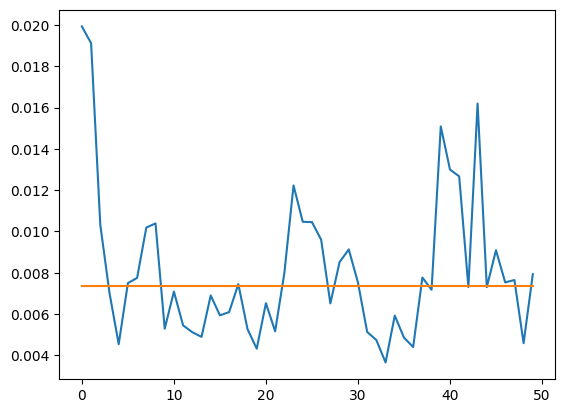

In [101]:
mediana_py= statistics.median(lista_func_py)
mediana_c= statistics.median(lista_func_c)
print(mediana_py,mediana_c)
arreglo_mediana = np.ones(50,dtype=np.float32)
arreglo_medi_py= mediana_py*arreglo_mediana
arreglo_medi_c= mediana_c*arreglo_mediana


import matplotlib.pyplot as plt

plt.plot(lista_func_py)
plt.plot(arreglo_medi_py)


n) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *C*. Incluya la mediana de los tiempos en el gráfico.

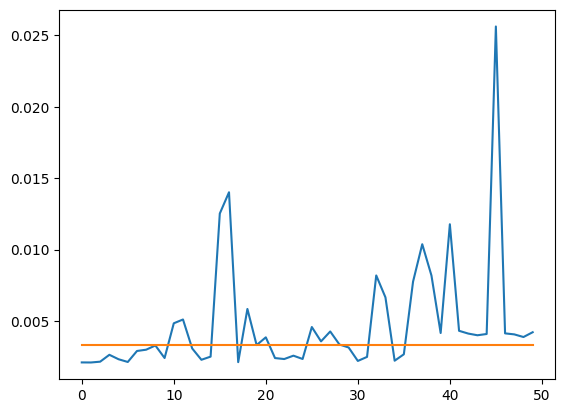

In [90]:
plt.plot(lista_func_c)
plt.plot(arreglo_medi_c)

o) (0.5 pto) Realizar 50 mediciones de tiempo para las funciones implementadas en *C* y *Python* para el mayor de los tamaños.

In [102]:
import time

size= potencias[-1]
iteraciones = 50
lista_func_py = []
lista_func_c = []
arregloP= crear_arreglo(size) 
for _ in range(iteraciones):
    tic_1 = time.perf_counter()
    py_normalizar_arreglo(arregloP)
    toc_1 = time.perf_counter()
    c_normalizar_vector(arregloP)
    tic_2 = time.perf_counter()
    
    #Guardo las 50 iteraciones en los arreglos lista_funcx
    lista_func_py.append(toc_1-tic_1)
    lista_func_c.append(tic_2-toc_1)
    

print(lista_func_py)
print(lista_func_c)


[1.5322945779989823, 1.3585243740017177, 1.3141784489998827, 1.1980340120062465, 1.3405832560019917, 2.1057879799991497, 1.3778944579971721, 1.3383167290012352, 1.381944526998268, 1.431438840001647, 1.2971907909959555, 1.470116414995573, 1.3178421849952429, 1.4546726100015803, 1.633920346997911, 2.4788748810024117, 1.9762371820033877, 2.283122645007097, 3.0445321389997844, 2.738634978995833, 1.8190788370047812, 1.9127286440052558, 2.19514703299501, 1.8249620950009557, 2.311407326000335, 1.722572074002528, 2.1661724349978613, 1.613393392006401, 2.524819288002618, 2.5564830340008484, 1.3499218220022158, 1.253432237994275, 1.3442132400014088, 1.341412384994328, 1.3463371529942378, 1.1965995319987996, 1.382618810996064, 1.3312084470016998, 1.724112605996197, 1.23969917800423, 1.4839959140008432, 1.4383241169998655, 1.9871665350001422, 1.7872488299981342, 1.5611077719950117, 1.7176460910050082, 1.6294763350015273, 1.406513547000941, 1.6880382540039136, 2.022951970997383]
[0.0002060050028376

p) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *Python*. Incluya la mediana de los tiempos en el gráfico.

1.546701174996997 0.0001555025010020472


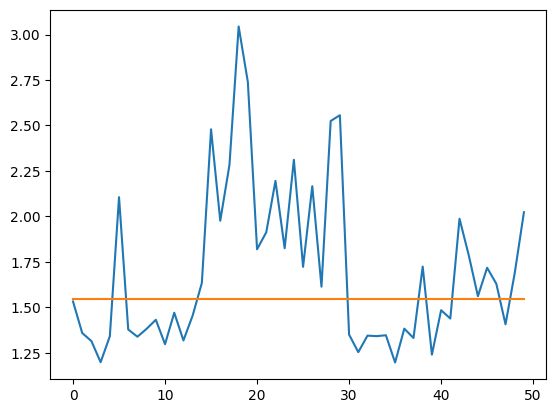

In [103]:

mediana_py= statistics.median(lista_func_py)
mediana_c= statistics.median(lista_func_c)
print(mediana_py,mediana_c)
arreglo_mediana = np.ones(50,dtype=np.float32)
arreglo_medi_py= mediana_py*arreglo_mediana
arreglo_medi_c= mediana_c*arreglo_mediana


import matplotlib.pyplot as plt

plt.plot(lista_func_py)
plt.plot(arreglo_medi_py)

q) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *C*. Incluya la mediana de los tiempos en el gráfico.

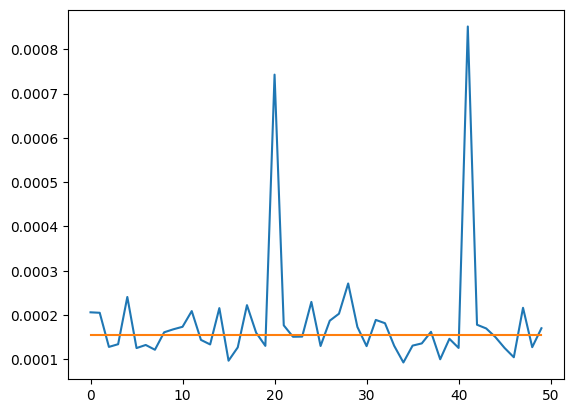

In [104]:
plt.plot(lista_func_c)
plt.plot(arreglo_medi_c)

r) (0.5 ptos) Realizar 50 mediciones de tiempo y error relativo para las funciones implementadas en *C* y *Python* para todos los tamaños. El elemento representativo de cada tamaño será la mediana de las 50 mediciones.

In [107]:
import time


lista_funcion1_PY = []
lista_funcion2_C = []

for size in potencias:

    iteraciones = 50
    lista_func_c = []
    lista_func_py = []
  
    arregloP= crear_arreglo(size) 
    
    for _ in range(iteraciones):
        tic_1 = time.perf_counter()
        py_normalizar_arreglo(arregloP)
        toc_1 = time.perf_counter()
        c_normalizar_vector(arregloP)
        tic_2 = time.perf_counter()
    
    #Guardo las 50 iteraciones en los arreglos lista_funcx
    lista_func_py.append(toc_1-tic_1)
    lista_func_c.append(tic_2-toc_1)

    # Voy guardando la mediana de las 50 tiempos tomadados a cada funcion para cada valor de ns
    lista_funcion1_PY.append(statistics.median(lista_func_py))
    lista_funcion2_C.append(statistics.median(lista_func_c))

print(lista_funcion1_PY)
print(lista_funcion2_C)


[0.002684363003936596, 0.0045688290119869635, 0.009007585002109408, 0.03423886299424339, 0.05777518700051587, 0.17264435299148317, 0.16185698501067236, 0.3163446010003099, 0.6466264369955752, 1.1154357920022449]
[3.028599894605577e-05, 4.92209946969524e-05, 0.00010354199912399054, 0.00024031400971580297, 0.0009911590022966266, 0.0017996009992202744, 0.00012414398952387273, 0.0001932279992615804, 0.0001506349944975227, 0.0001728819916024804]


s) (0.5 ptos) Presentar una gráfica de tiempo de ejecución por tamaño a partir de sus mediciones del ítem anterior.

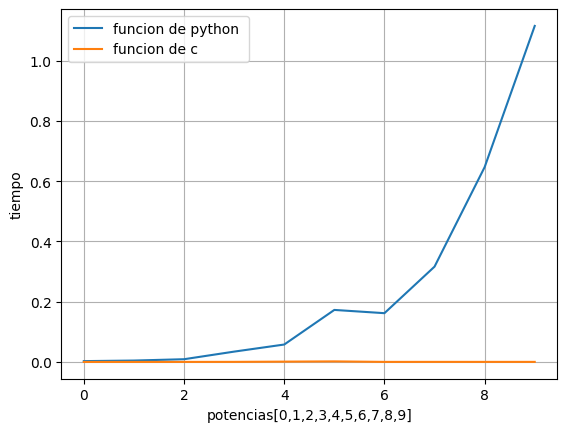

In [109]:
plt.plot([0,1,2,3,4,5,6,7,8,9],lista_funcion1_PY[:],label='funcion de python ')
plt.plot([0,1,2,3,4,5,6,7,8,9],lista_funcion2_C[:],label='funcion de c')

plt.xlabel("potencias[0,1,2,3,4,5,6,7,8,9]")
plt.ylabel("tiempo")
plt.grid()
plt.legend()

Text(0.5, 1.0, 'Tiempo de ejecución por tamaño')

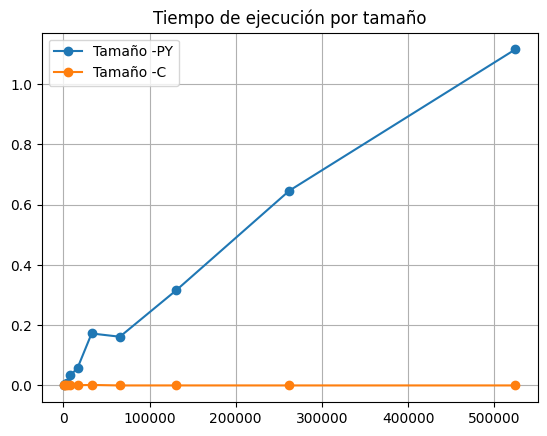

In [110]:
plt.plot(potencias, lista_funcion1_PY, '-o',label='Tamaño -PY')
plt.plot(potencias, lista_funcion2_C,'-o', label='Tamaño -C')
plt.legend()
plt.grid(True)
plt.title(f'Tiempo de ejecución por tamaño')

t) (0.5 ptos) Presentar una gráfica de speedup por tamaño a partir de sus mediciones.

u) (0.5 ptos) Presentar una gráfica de error relativo por tamaño a partir de sus mediciones